In [1]:
import pandas as pd
import numpy as np
import scipy.spatial.distance as dist
from sklearn.cluster import MeanShift as ms 

In [2]:
frame = pd.read_csv('checkins1.csv', header=0, sep=',')
offices = pd.read_csv('offices.csv', header=0, sep=',')
frame.dropna(subset=['latitude'], inplace=True)
frame = frame.drop(['created_at','id','user_id','venue_id'], axis=1)

/Users/obielov/Documents/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
frame = frame[:100000]

In [4]:
clustering = ms(bandwidth = 0.1)
clustering.fit(frame)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [5]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

In [6]:
counts = np.bincount(labels)
ind = [i for i,v in enumerate(counts) if v > 14]

In [7]:
offices = offices.values

In [15]:
dist_arr = []
for office in offices:
    for center in cluster_centers:
       dist_arr.append([dist.euclidean(office,center), office, center])

a = sorted(dist_arr, key=lambda entry: entry[0])
with open("answer_assignment.txt", "w") as file:
    file.write(str(a[0][2]))

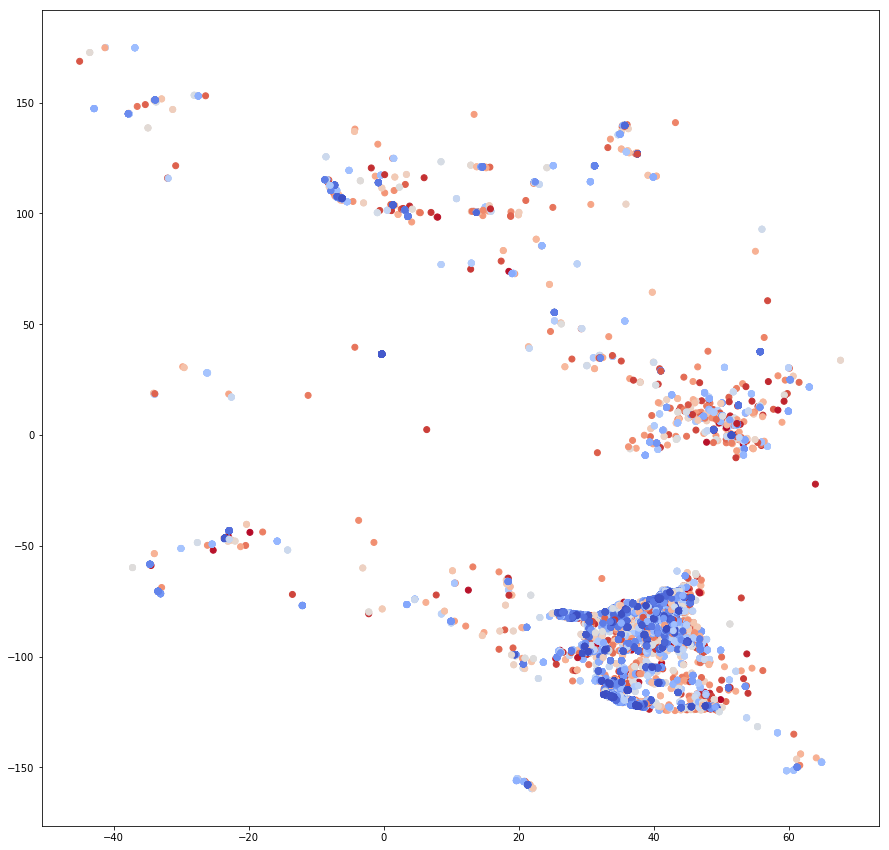

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.scatter(frame[:100000]['latitude'].as_matrix(), frame[:100000]['longitude'].as_matrix(), 
            cmap=plt.get_cmap('coolwarm'), c=labels)
plt.show()